In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing Adidas US sales Dataset

In [3]:
sample=pd.read_excel("C:/Users/HP/Downloads/Adidas US Sales Datasets.xlsx")

Information about the dataset

In [5]:
print(sample.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


Checking for missing values in the dataset

In [6]:
print(sample.isnull().sum())

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64


Summary Statistics

In [30]:
num_col=sample.drop(['Retailer','Retailer ID','Invoice Date','Region','State','City','Product','Sales Method'],axis=1)
num_col.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.244761,0.422991
std,14.705397,214.252030,141916.016727,54193.113713,0.097197
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000


Sales Distribution 

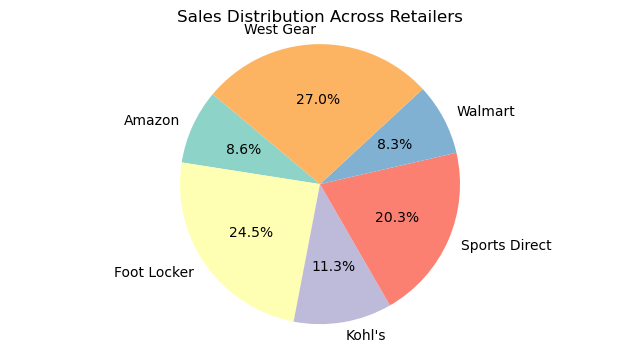

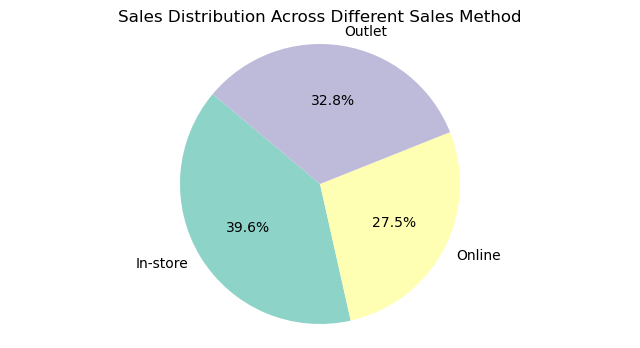

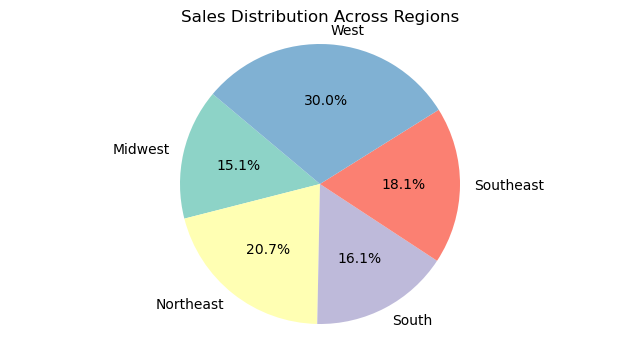

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = sample #sample is variable which contains Adidas US sales data

# Sum of sales for each retailer
retailer_sales = df.groupby('Retailer')['Total Sales'].sum().reset_index()


# Set the color palette
palette = sns.color_palette("Set3", len(retailer_sales))

# Pie chart for sales distribution across each retailer
plt.figure(figsize=(8, 4))
plt.pie(retailer_sales['Total Sales'], labels=retailer_sales['Retailer'], autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Sales Distribution Across Retailers')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



# Sum of sales for each sales method
method_sales = df.groupby('Sales Method')['Total Sales'].sum().reset_index()


# Set the color palette
palette = sns.color_palette("Set3", len(method_sales))

# Pie chart for sales distribution across sales method
plt.figure(figsize=(8, 4))
plt.pie(method_sales['Total Sales'], labels= method_sales['Sales Method'], autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Sales Distribution Across Different Sales Method')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Sum of sales for each sales method
region_sales = df.groupby('Region')['Total Sales'].sum().reset_index()


# Set the color palette
palette = sns.color_palette("Set3", len(region_sales))

# Pie chart for sales distribution across sales method
plt.figure(figsize=(8, 4))
plt.pie(region_sales['Total Sales'], labels= region_sales['Region'], autopct='%1.1f%%', startangle=140, colors=palette)
plt.title('Sales Distribution Across Regions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()



Sales shown by different sales method across retailers

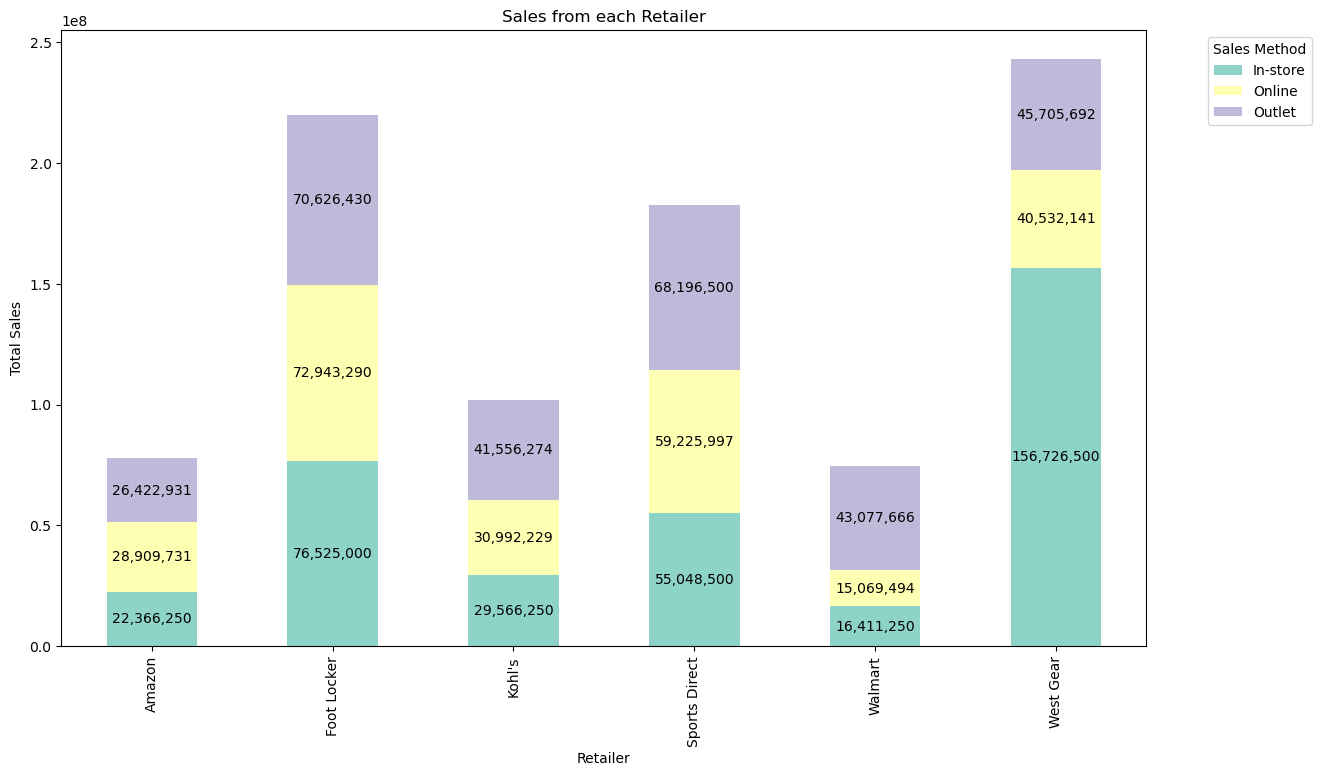

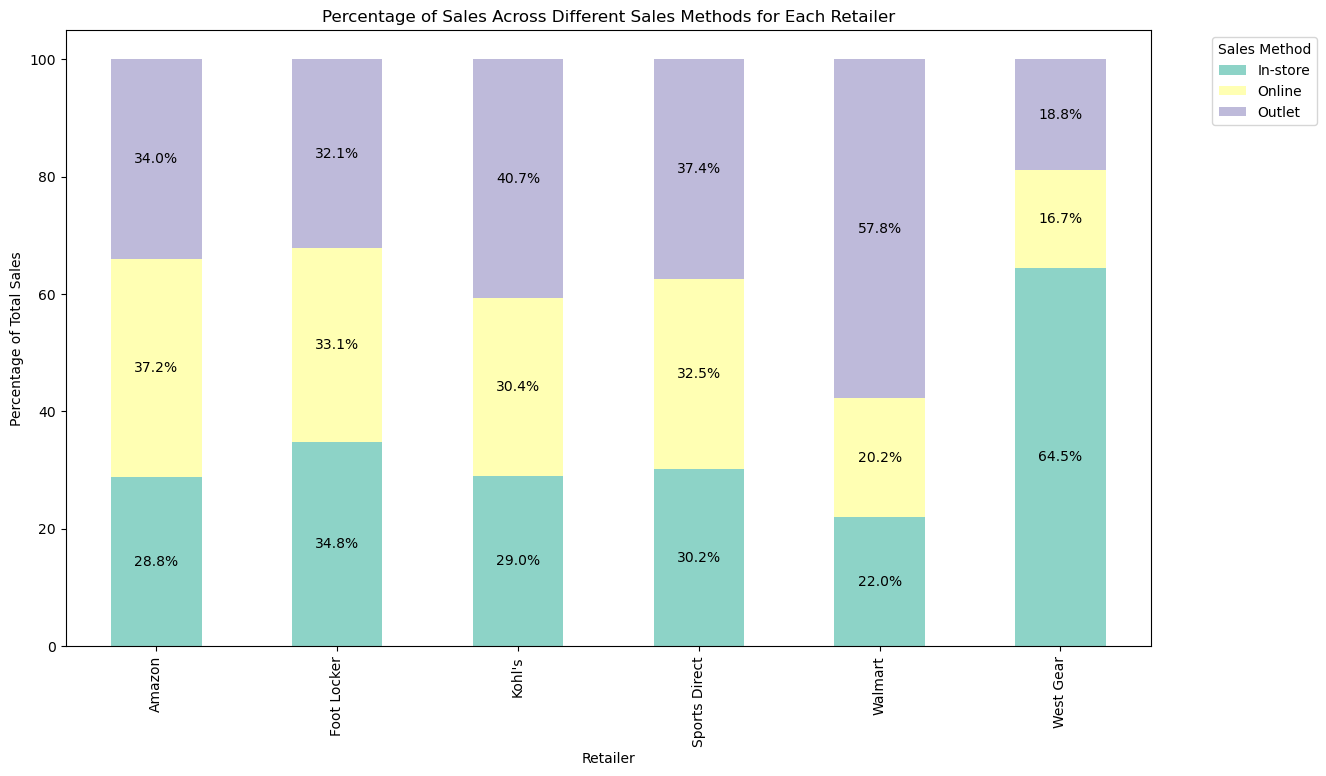

In [60]:
##Bar Chart


# Sum of sales for each retailer by sales method
sales_method_sales = df.groupby(['Retailer', 'Sales Method'])['Total Sales'].sum().unstack().fillna(0)

# Set the color palette
palette = sns.color_palette("Set3", len(sales_method_sales.columns))

# Create the bar chart with stacked bars
ax = sales_method_sales.plot(kind='bar', stacked=True, figsize=(14, 8), color=palette)
plt.title('Sales from each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Total Sales')
plt.legend(title='Sales Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add data labels
for container in ax.containers:
    labels = [f'{int(value):,}' if value > 0 else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

plt.show()


## 100% Stacked Bar Chart

# Sum of sales for each retailer by sales method
sales_method_sales = df.groupby(['Retailer', 'Sales Method'])['Total Sales'].sum().unstack().fillna(0)

# Normalize the data to get percentages
sales_method_sales_percentage = sales_method_sales.div(sales_method_sales.sum(axis=1), axis=0) * 100

# Set the color palette
palette = sns.color_palette("Set3", len(sales_method_sales.columns))

# Create the 100% stacked bar chart
ax = sales_method_sales_percentage.plot(kind='bar', stacked=True, figsize=(14, 8), color=palette)
plt.title('Percentage of Sales Across Different Sales Methods for Each Retailer')
plt.xlabel('Retailer')
plt.ylabel('Percentage of Total Sales')
plt.legend(title='Sales Method', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add data labels
for container in ax.containers:
    labels = [f'{value:.1f}%' if value > 0 else '' for value in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', fontsize=10, color='black')

plt.show()

In [64]:
# Sales across each product by various retailers in a region
retailer_region_product = sample.groupby(['Retailer','Region','Product']).agg({'Units Sold': 'sum'}).reset_index()
retailer_region_product


,Retailer,Region,Product,Units Sold
0,Amazon,Midwest,Men's Apparel,6054
1,Amazon,Midwest,Men's Athletic Footwear,7643
2,Amazon,Midwest,Men's Street Footwear,11391
3,Amazon,Midwest,Women's Apparel,7755
4,Amazon,Midwest,Women's Athletic Footwear,5801
...,...,...,...,...
161,West Gear,West,Men's Athletic Footwear,63197
162,West Gear,West,Men's Street Footwear,73294
163,West Gear,West,Women's Apparel,58365
164,West Gear,West,Women's Athletic Footwear,46712


In [67]:

# Sales across each product by various retailers in a particular state and city
state_city_product = sample.groupby(['Retailer','Region','State','City', 'Sales Method','Product']).agg({'Units Sold': 'sum'}).reset_index()
state_city_product

,Retailer,Region,State,City,Sales Method,Product,Units Sold
0,Amazon,Midwest,Ohio,Columbus,Online,Men's Apparel,6054
1,Amazon,Midwest,Ohio,Columbus,Online,Men's Athletic Footwear,7643
2,Amazon,Midwest,Ohio,Columbus,Online,Men's Street Footwear,11391
3,Amazon,Midwest,Ohio,Columbus,Online,Women's Apparel,7755
4,Amazon,Midwest,Ohio,Columbus,Online,Women's Athletic Footwear,5801
...,...,...,...,...,...,...,...
1293,West Gear,West,Washington,Seattle,Online,Men's Athletic Footwear,1717
1294,West Gear,West,Washington,Seattle,Online,Men's Street Footwear,1936
1295,West Gear,West,Washington,Seattle,Online,Women's Apparel,1513
1296,West Gear,West,Washington,Seattle,Online,Women's Athletic Footwear,1234


Sales by Product,Region, Retailer,Sales Method

In [76]:


# Set 'Date' column as datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Aggregate by month and sum sales
monthly_sales = df.groupby(['Product','Region','Retailer','Sales Method', pd.Grouper(key='Date', freq='M')])['Units Sold'].sum().reset_index()

monthly_sales

,Product,Region,Retailer,Sales Method,Date,Units Sold
0,Men's Apparel,Midwest,Amazon,Online,2021-01-31,252
1,Men's Apparel,Midwest,Amazon,Online,2021-02-28,572
2,Men's Apparel,Midwest,Amazon,Online,2021-03-31,488
3,Men's Apparel,Midwest,Amazon,Online,2021-04-30,476
4,Men's Apparel,Midwest,Amazon,Online,2021-05-31,576
...,...,...,...,...,...,...
3888,Women's Street Footwear,West,West Gear,Outlet,2021-08-31,373
3889,Women's Street Footwear,West,West Gear,Outlet,2021-09-30,188
3890,Women's Street Footwear,West,West Gear,Outlet,2021-10-31,199
3891,Women's Street Footwear,West,West Gear,Outlet,2021-11-30,259


# Analytical Dataset (ADS)

Analytical Dataset:
    The sales of each product is grouped and aggregated for each month. Hence, the Analytical Dataset (ADS) containing Product Sales at month level is created.

In [22]:
# Product Sales

# Convert 'Invoice Date' to datetime
sample['Invoice Date'] = pd.to_datetime(sample['Invoice Date'])

# Create a new column with the first date of each month
sample['Date'] = sample['Invoice Date'].dt.to_period('M').dt.to_timestamp()

# Group by 'MonthStart' and 'Product' and sum 'Units Sold'
df = sample.groupby(['Date', 'Product']).agg({'Units Sold': 'sum'}).reset_index()

# Print the result
print(df)
df.to_csv('ADS.csv', index=False)


          Date                    Product  Units Sold
0   2020-01-01              Men's Apparel        5902
1   2020-01-01    Men's Athletic Footwear        7791
2   2020-01-01      Men's Street Footwear       11919
3   2020-01-01            Women's Apparel        8489
4   2020-01-01  Women's Athletic Footwear        6261
..         ...                        ...         ...
139 2021-12-01    Men's Athletic Footwear       30849
140 2021-12-01      Men's Street Footwear       41059
141 2021-12-01            Women's Apparel       28830
142 2021-12-01  Women's Athletic Footwear       22957
143 2021-12-01    Women's Street Footwear       25524

[144 rows x 3 columns]


Shape of Analytical Dataset

In [23]:
df.shape

(144, 3)